In [1]:
import numpy as np
from matplotlib import pylab as plt

### Этап 1. Предсказание на линейной модели

#### 1.1 Лин модель

$\phi_1(x) = x$    
$\phi_2(x) = 4x$

In [2]:
def phi_lin_1(x: float)->float:
    return x
def phi_lin_2(x: float)->float:
    return 4 * x

#### 1.2 Моделирование фи-функции


In [3]:
def model_phi_func(h: float, x_range: float, 
                       f1: object, f2: object, n=2)->"np.array":
    '''Моделирование линейной фи функции'''
    x_ = np.arange(0, x_range, h)
    
    part1_ = f1(x_)
    part2_ = f2(x_) + part1_[-1] + 1
    
    part_ = np.concatenate([part1_, part2_])
    
    for i in range(1, n):
        boost_coef_ = part_[-1] + f2(x_[1])
        
        part_n_ = np.copy(part_) + boost_coef_
        
        part_ = np.concatenate([part_, part_n_])
    
    
    x_concat_ = np.arange(0, len(part_), 1)

    return x_concat_, part_

##### Примеры

In [4]:
n1_x, n1_y = model_phi_func(1, 10, phi_lin_1, phi_lin_2, 1)
n2_x, n2_y = model_phi_func(1, 10, phi_lin_1, phi_lin_2, 2)
n3_x, n3_y = model_phi_func(1, 10, phi_lin_1, phi_lin_2, 3)
n4_x, n4_y = model_phi_func(1, 10, phi_lin_1, phi_lin_2, 4)

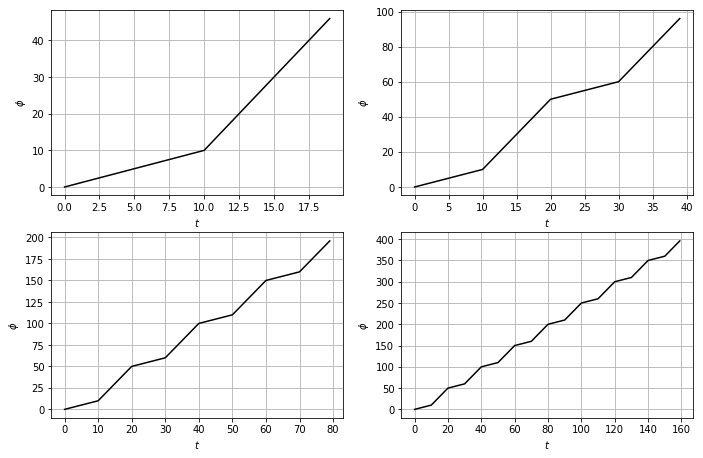

In [5]:
plt.figure(figsize=(11.5, 7.5))
plt.subplot(2,2,1)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n1_x, n1_y, color="black", label="n = 1")

plt.subplot(2,2,2)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n2_x, n2_y,  color="black", label="n = 2")

plt.subplot(2,2,3)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n3_x, n3_y,  color="black", label="n = 3")

plt.subplot(2,2,4)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n4_x, n4_y,  color="black", label="n = 4")

plt.savefig("./figures/linear_example.eps", format="eps")
plt.show()

#### 1.3 Численная апроксимация производной

In [6]:
def num_dif(y: list, h: float)->float:
    if len(y) == 2:
        return (y[1]  - y[0]) / h
    if len(y) == 4:
        return 1 / (6 * h) * (- 11 * y[0] + 18 * y[1] - 9 * y[2] + 2 * y[3])
    if len(y) == 5:
        return 1 / (12 * h) * (-25 * y[0] + 
                               48 * y[1] - 
                               36 * y[2] + 
                               16 * y[3] - 
                               3 * y[4]) 
    if len(y) == 6:
        return 1 / (60 * h) * (-137 * y[0] + 
                               300 * y[1] - 
                               300 * y[2] + 
                               200 * y[3] - 
                               75 * y[4] + 
                               12 * y[5])  

#### 1.4 2-x точечная апроксимация

In [7]:
x, phi = model_phi_func(1, 10, phi_lin_1, phi_lin_2, 3)

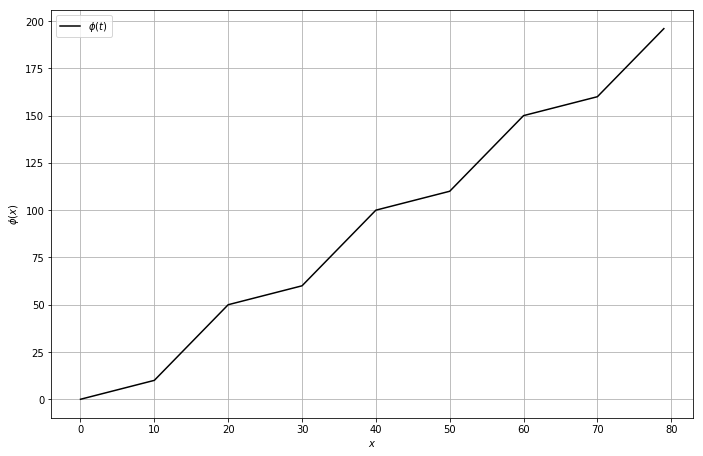

In [8]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$\phi(x)$")
plt.plot(x, phi, color="black", label="$\phi(t)$")
plt.legend()
plt.savefig("./figures/linear_model.eps", format="eps")
plt.show()

In [9]:
n = 2
eps = 10e-5
h = x[1] - x[0]
points_lin = []
for i in range(n ,len(phi) - n):
    dif1 = num_dif([phi[i - n], phi[i - n + 1]], h)
    dif2 = num_dif([phi[i + 1], phi[i + n]], h)

    if np.abs(dif1 - dif2) >= eps:
        points_lin.append([x[i], phi[i]])

points_lin = points_lin[1::3]
points_lin = np.array(points_lin)

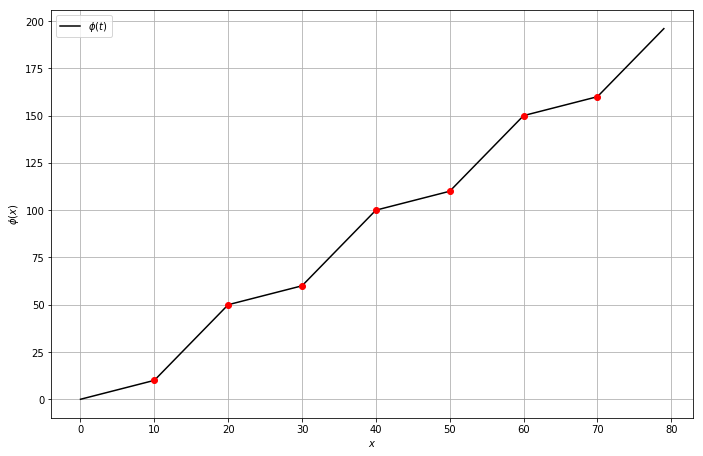

In [10]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$\phi(x)$")
plt.plot(x, phi, color="black", label="$\phi(t)$")
for elem in points_lin:
    plt.plot(elem[0], elem[1], "ro")
plt.legend()
plt.savefig("./figures/linear_model.eps", format="eps")
plt.show()

### Этап 2. Предсказание ни нелинейной модели

#### 2.1 Нелин. модель

$\phi_1(x) = x + \sin{x}$   
$\phi_1(x) = 4 x + 2\sin{x}$

In [11]:
def phi_nonlin_1(x: float)->float:
    return x + np.sin(x)
def phi_nonlin_2(x: float)->float:
    return 4 * x + 2 * np.sin(x)

###### Примеры

In [12]:
n1_x, n1_y = model_phi_func(1, 10, phi_nonlin_1, phi_nonlin_2, 1)
n2_x, n2_y = model_phi_func(1, 10, phi_nonlin_1, phi_nonlin_2, 2)
n3_x, n3_y = model_phi_func(1, 10, phi_nonlin_1, phi_nonlin_2, 3)
n4_x, n4_y = model_phi_func(1, 10, phi_nonlin_1, phi_nonlin_2, 4)

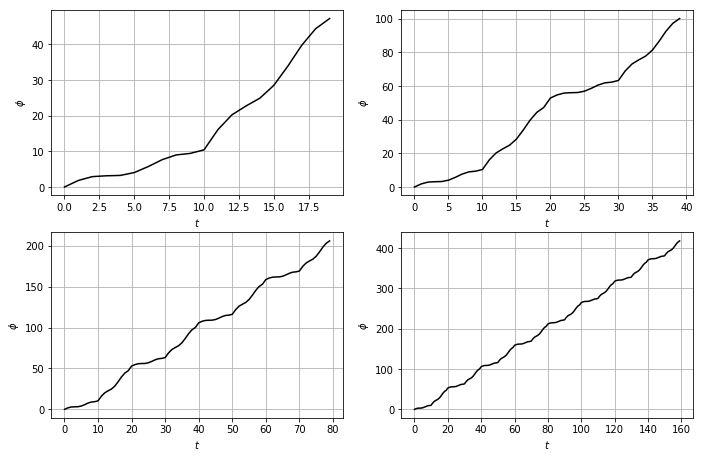

In [13]:
plt.figure(figsize=(11.5, 7.5))
plt.subplot(2,2,1)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n1_x, n1_y, color="black", label="n = 1")

plt.subplot(2,2,2)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n2_x, n2_y,  color="black", label="n = 2")

plt.subplot(2,2,3)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n3_x, n3_y,  color="black", label="n = 3")

plt.subplot(2,2,4)
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi$")
plt.plot(n4_x, n4_y,  color="black", label="n = 4")

plt.savefig("./figures/nonlinear_example.eps", format="eps")
plt.show()

####  2.2 Кусочная апроксимация

$\phi(t) = At + b$, $\phi(t)=Ap$, $A=(t~~1)$ 

In [14]:
def fin_dif_aprox(x: "ndarray", phi: "ndarray", h: int)->"ndarray":
    n_ = len(x) / h
    x_apr_ ,phi_apr_ = [] , []
    for i in range(0, len(x), h):
        x_apr_.append(x[i: i + h])
        phi_apr_.append(phi[i: i + h])
    
    x_apr_, phi_apr_ = np.array(x_apr_), np.array(phi_apr_)
    
    A_ , p_ = [], []
    
    for i in range(int(n_)):
        x_loc_ = x_apr_[i]
        phi_loc_ = phi_apr_[i]
        
        A_loc_ = np.vstack([x_loc_, np.ones(h)]).T
        p_loc_ = np.linalg.lstsq(A_loc_, phi_loc_, rcond=None)[0]
        
        A_.append(A_loc_)
        p_.append(p_loc_)
    
    p_ = np.array(p_)
    
    phi_apr_res_ = []
    for i in range(int(n_)):
        phi_apr_res_.append(x_apr_[i] * p_[i][0] + p_[i][1])
    
    return x_apr_, np.array(phi_apr_res_), int(n_)

#### 2.3 4-x точечная апроксимация нелин фи

In [15]:
nonlin_t, nonlin_phi = model_phi_func(1, 10, phi_nonlin_1, phi_nonlin_2, 3)

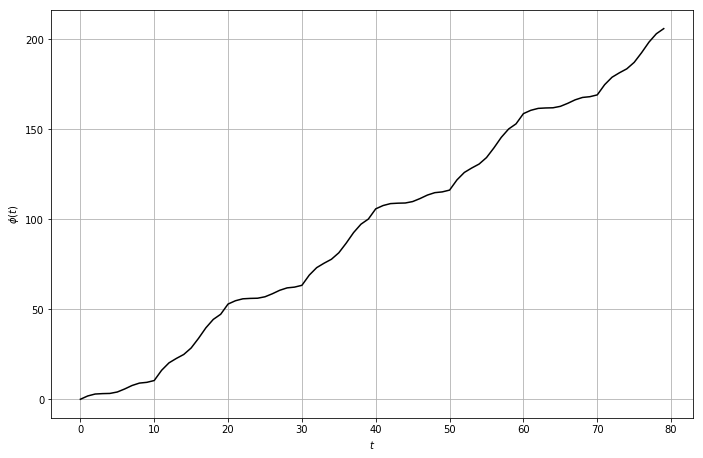

In [16]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")

plt.plot(nonlin_t, nonlin_phi, color="black")
plt.savefig("./figures/nonlinear_model.eps", format="eps")

plt.show()

In [17]:
nonlin_t_aprox , nonlin_phi_aprox, n_p = fin_dif_aprox(nonlin_t, nonlin_phi, 4)
# print(nonlin_x_aprox)
# print(nonlin_phi_aprox)

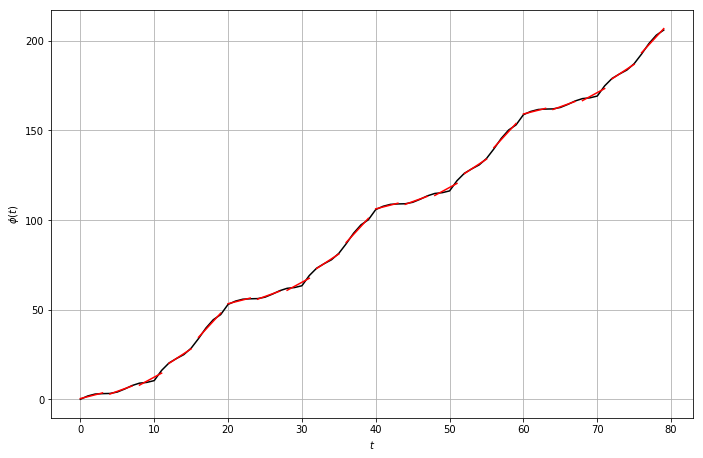

In [18]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
plt.savefig("./figures/nonlinear_model_aprox.eps", format="eps")
plt.show()

#### 2.4 Прогноз

In [19]:
eps = 0.4
h = 4
res_ = []
for i in range(0, n_p - 1):
    dif1_nl = num_dif(nonlin_phi_aprox[i], h)
    dif2_nl = num_dif(nonlin_phi_aprox[i + 1], h)
    
    if np.abs(dif1_nl - dif2_nl) >= eps:
        res_.append([nonlin_t[h * (i + 1)], nonlin_phi[h * (i+ 1)]])
    

res_ = np.array(res_)

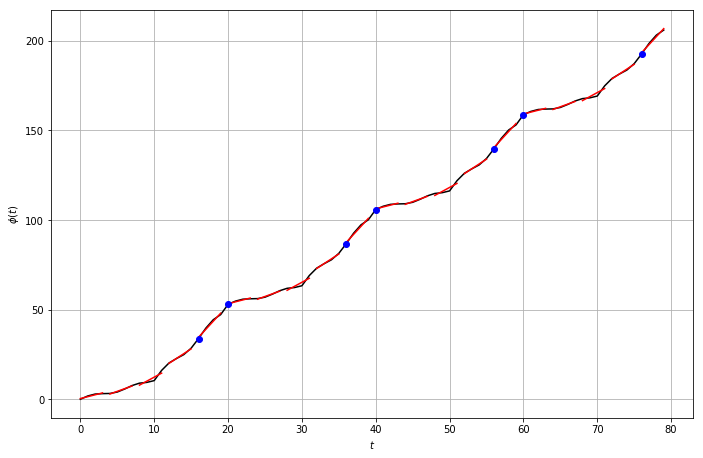

In [20]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
for elem in res_:
    plt.plot(elem[0], elem[1], "bo")
plt.savefig("./figures/nonlinear_model_result_4.eps", format="eps")
plt.show()

#### 2.5 Прогноз для 5 точек


In [21]:
nonlin_t_aprox , nonlin_phi_aprox, n_p = fin_dif_aprox(nonlin_t, nonlin_phi, 5)
# print(nonlin_phi_aprox)

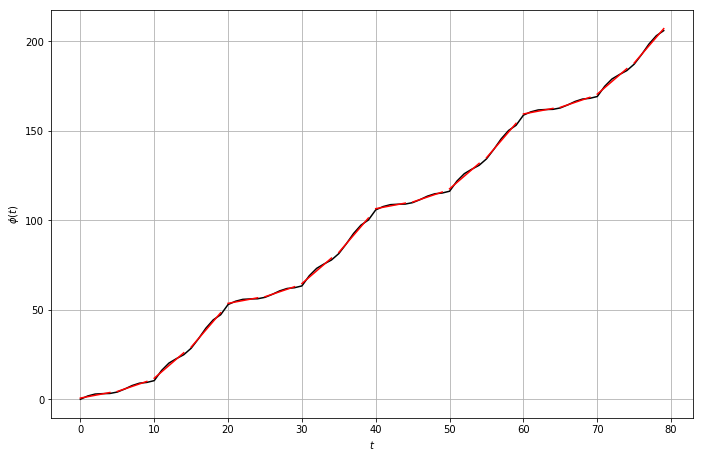

In [22]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
plt.savefig("./figures/nonlinear_model_aprox_5.eps", format="eps")
plt.show()

In [23]:
eps = 0.4
h = 5
res_ = []
for i in range(n_p - 1):
    dif1_nl = num_dif(nonlin_phi_aprox[i], h)
    dif2_nl = num_dif(nonlin_phi_aprox[i + 1], h)
#     print(np.abs(dif1_nl - dif2_nl))
    if np.abs(dif1_nl - dif2_nl) >= eps:
        res_.append([nonlin_t[h * (i + 1)], nonlin_phi[h * (i+ 1)]])
    

res_ = np.array(res_)

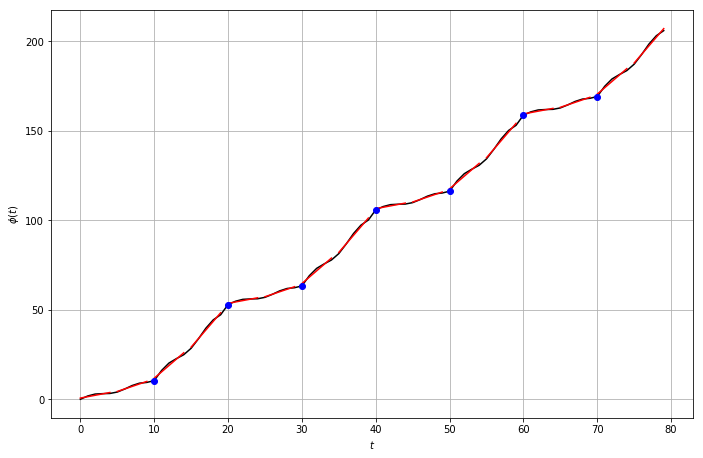

In [24]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
for elem in res_:
    plt.plot(elem[0], elem[1], "bo")
plt.savefig("./figures/nonlinear_model_result_5.eps", format="eps")
plt.show()

#### Прогноз для 6 точек

In [25]:
nonlin_t_aprox , nonlin_phi_aprox, n_p = fin_dif_aprox(nonlin_t, nonlin_phi, 6)

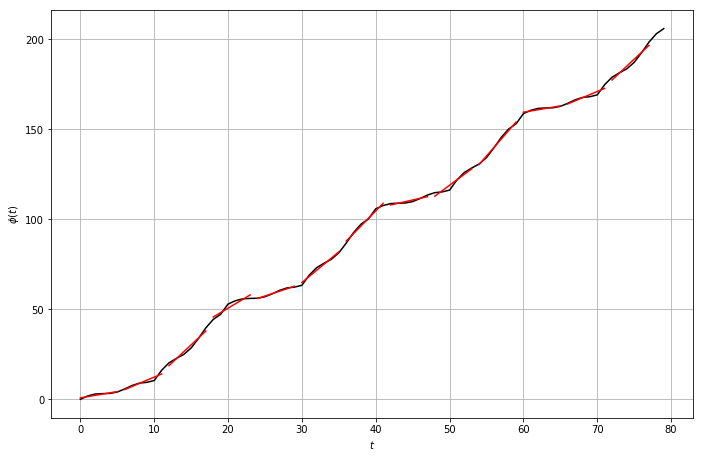

In [26]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
plt.savefig("./figures/nonlinear_model_aprox_6.eps", format="eps")
plt.show()

In [27]:
eps = 0.3
h = 6
res_ = []
for i in range(n_p - 1):
    dif1_nl = num_dif(nonlin_phi_aprox[i], h)
    dif2_nl = num_dif(nonlin_phi_aprox[i + 1], h)
#     print(np.abs(dif1_nl - dif2_nl))
    if np.abs(dif1_nl - dif2_nl) >= eps:
        res_.append([nonlin_t[h * (i + 1)], nonlin_phi[h * (i+ 1)]])
    

res_ = np.array(res_)

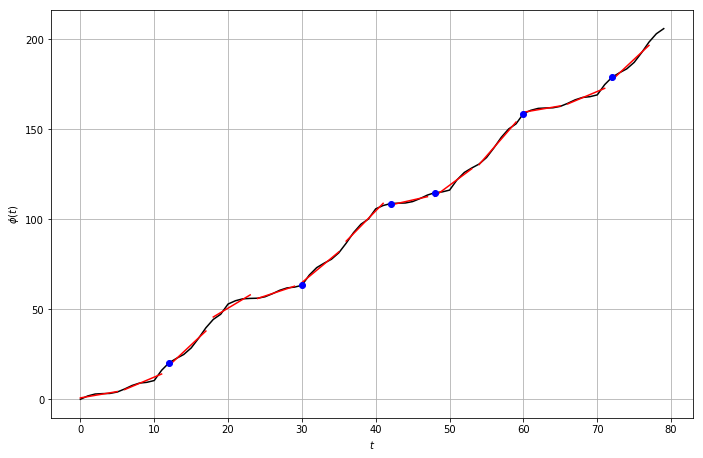

In [28]:
plt.figure(figsize=(11.5, 7.5))
plt.grid(True)
plt.xlabel("$t$")
plt.ylabel("$\phi(t)$")
plt.plot(nonlin_t, nonlin_phi, color="black")
for i in range(n_p):
    plt.plot(nonlin_t_aprox[i], nonlin_phi_aprox[i], "r")
for elem in res_:
    plt.plot(elem[0], elem[1], "bo")
plt.savefig("./figures/nonlinear_model_result_6.eps", format="eps")
plt.show()